In [19]:
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import calendar

# Import data

In [177]:
with open('logins.json') as f:
  data = json.load(f)

In [194]:
df = pd.DataFrame(data)
print(len(df))
df.head()

93142


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [195]:
df['login_time'] = pd.to_datetime(df['login_time'])

In [196]:
df['count'] = 0
df.set_index('login_time', inplace=True)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   93142 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [198]:
df_org = df.copy()

# 15 Minute- intervals

In [199]:
df15 = df.resample('15Min').count()
df15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Text(0.5, 1.0, '15 Minute interval usage plot')

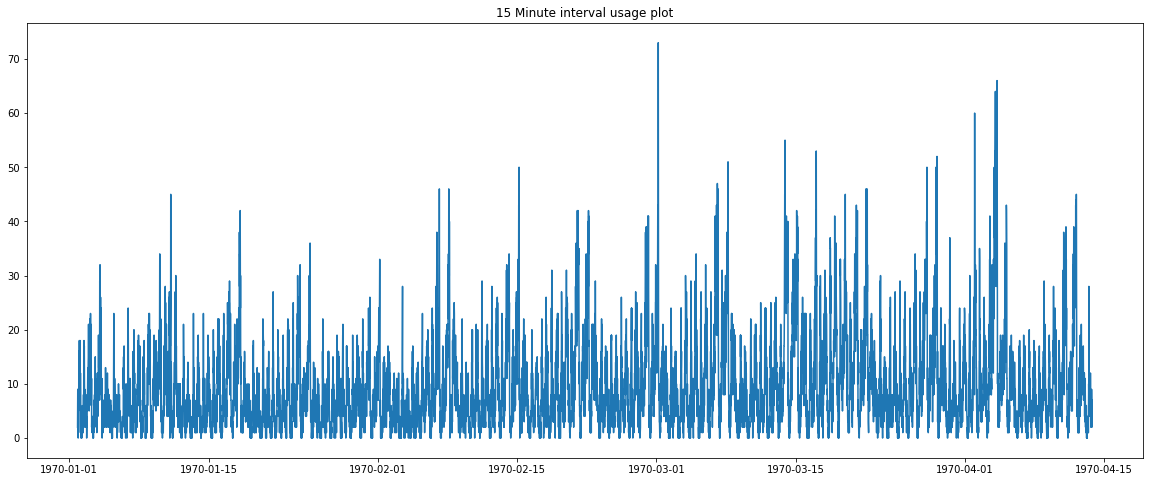

In [200]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
plt.plot(df15)
plt.title('15 Minute interval usage plot')

Text(0.5, 1.0, '15 Minute interval usage plot for a single week')

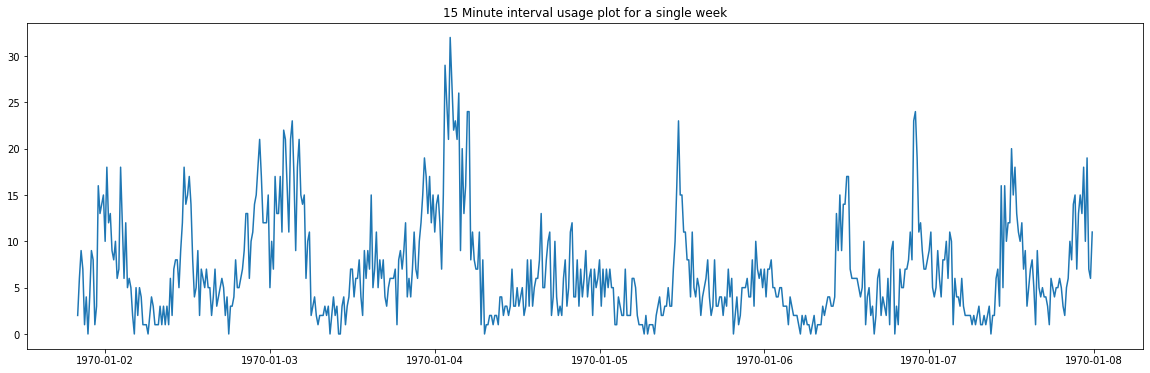

In [201]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 6)
plt.plot(df15['19700101':'19700107'])
plt.title('15 Minute interval usage plot for a single week')

#### We can observe that the usage isn't constant throughout each day. We should plot an hourly usage demand, and try to find out the peak hours!

In [215]:
df.head()

,count,hour
login_time,,
1970-01-01 20:13:18,0,NaN
1970-01-01 20:16:10,0,NaN
1970-01-01 20:16:37,0,NaN
1970-01-01 20:16:36,0,NaN
1970-01-01 20:26:21,0,NaN


In [218]:
df_noindex = df.reset_index()

In [219]:
def getHour(x):
    return datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").hour
    
df_noindex['hour'] = df_noindex.reset_index()['login_time'].apply(getHour)
df_noindex.head()

,login_time,count,hour
0,1970-01-01 20:13:18,0,20
1,1970-01-01 20:16:10,0,20
2,1970-01-01 20:16:37,0,20
3,1970-01-01 20:16:36,0,20
4,1970-01-01 20:26:21,0,20


In [221]:
pd.DataFrame(df_noindex.groupby('hour')['count'].count())#.transpose()#.hist()#.sort_values(ascending=False)

,count
hour,
0,5993
1,6317
2,5800
3,4831
4,5034
5,2945
6,1138
7,815
8,818


#### The peak hours can be outlined as:
##### 12am-4am (HIGH)
##### 4am-10am (low)
##### 10am-3pm (Moderate)
##### 3pm-8pm (low)
##### 8pm-12am (HIGH)

# Daily Cycles

Text(0.5, 1.0, 'Daily demand plot')

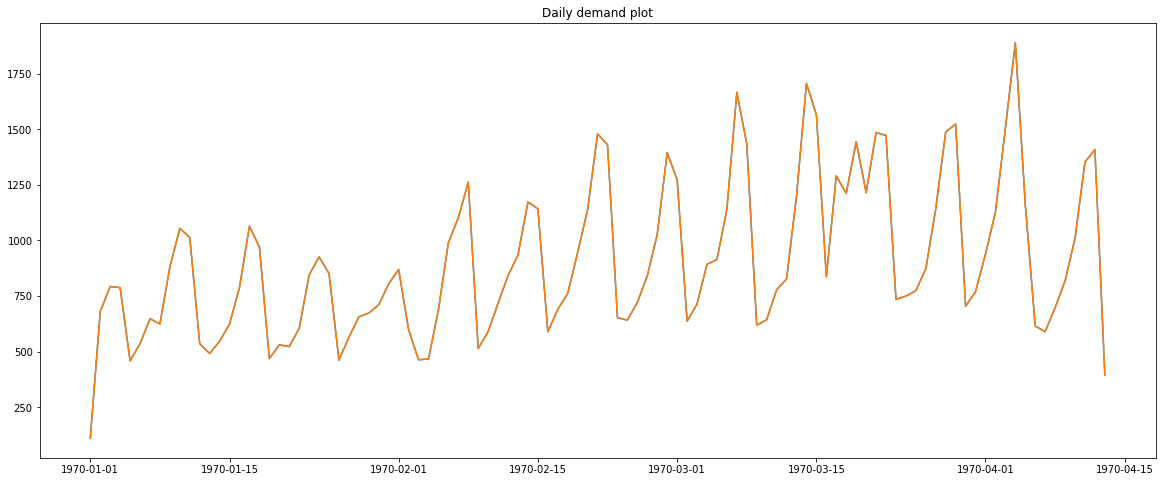

In [152]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
plt.plot(df.set_index('login_time').resample('D').count())
plt.title('Daily demand plot')
#plt.xticks(rotation=45)

#### The above plot shows that there is a spike followed by drop, in every weekly cycle.
#### Lets try to dig deeper, to find out if there an inmbalance in the demand at different days of the week.

# Weekday vs Weekend

In [135]:
def getWeekday(x):
    x = datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").weekday()
    return calendar.day_name[x]

df = df.reset_index()
df['weekday'] = df['login_time'].apply(getWeekday)
df.head()

,login_time,count,weekday
0,1970-01-01 20:13:18,0,Thursday
1,1970-01-01 20:16:10,0,Thursday
2,1970-01-01 20:16:37,0,Thursday
3,1970-01-01 20:16:36,0,Thursday
4,1970-01-01 20:26:21,0,Thursday


In [138]:
df.groupby('weekday')['count'].count().sort_values(ascending=False)

weekday
Saturday     19377
Sunday       18167
Friday       15208
Thursday     11960
Wednesday    10339
Tuesday       9268
Monday        8823
Name: count, dtype: int64

#### We can deduce from the above data, that the Demand is significantly high during the weekends (i.e, Fridays, Saturdays, Sundays)
#### when compared to other weekdays.